In [99]:
import numpy as np
import time
import matplotlib.pyplot as plt
import math
import scipy.optimize as optimization
from scipy.optimize import curve_fit
import random
import statistics
from random import shuffle
from scipy import stats
from scipy.stats import binom
from scipy.optimize import minimize, rosen, rosen_der
from astropy.cosmology import WMAP9 as cosmo
import scipy.integrate as integrate
from scipy.stats import gaussian_kde
from scipy.signal import find_peaks

from scipy.integrate import solve_ivp
from astropy.modeling import models
from astropy import units as u
from scipy.constants import h,k,c
import warnings
warnings.filterwarnings("ignore")
from scipy import integrate, interpolate
import lmfit
import corner
from lmfit import Parameters, fit_report, minimize
from scipy.stats import norm
import scipy
from scipy.integrate import quad
import emcee
from sklearn.neighbors import KernelDensity
import sys
import os
from astropy.modeling import models
from astropy import units as u
from astropy.coordinates import Distance
from astropy.cosmology import Planck15

from scipy.integrate import simps

import matplotlib.ticker as ticker

In [100]:
data = np.loadtxt('LT_relation.txt')

z = data[:,0]
# m = data[:,1]

T = data [:,10]

s250 = data [:,1]
s250_err = data[:,2]

s350 = data [:,3]
s350_err = data[:,4]

s500 = data [:,5]
s500_err = data[:,6]

L_IR = data[:,7]
# L_IR = np.delete(L_IR, 171)

T_log = np.log10(data [:,10])
# T_log = np.delete(T_log, 171)

S_list = []
S_err_list = []
for i in range(len(s250)):
    
    S_list.append((s250[i],s350[i],s500[i]))
    
    S_err_list.append((s250_err[i],s350_err[i],s500_err[i]))
    

S_array = np.array(S_list)

S_err_array = np.array(S_err_list)



In [101]:
np.log10(L_IR[90])

11.462397997898956

In [102]:
10**(T_log[90])

24.099999999999998

In [103]:
wavelen_obs = np.array([250e-6,350e-6,500e-6])
    
freq_obs = (c/wavelen_obs)

beta = 1.5

wavelen_obs = np.array([250,350,500])*(10**-6)
    
freq_obs = (c/wavelen_obs)


freq_obs

array([1.19916983e+12, 8.56549880e+11, 5.99584916e+11])

In [104]:


index_number = 86



spire_fluxes = (S_array[index_number])
spire_flux_errors = S_err_array[index_number]

# spire_fluxes = np.array([38.8, 56.8, 58.5 ]) 
# spire_flux_errors = np.array([12.4,7.0,5.3])


# actual source parameters
actual_z = z[index_number]
actual_T = T[index_number]

In [105]:


def convert_to_frequency(lam):
    # convert wavelength in um to frequency in Hz
    lam = lam * 1e-6
    return c / lam

def convert_to_wavelength(freq):
    # convert frequency in Hz to wavelength in um
    return 1e6 * c / freq

# ###########################################
# # Define constants

# # wavelength and frequency grids
wa = np.linspace(0.1, 500, 1000)
fa = convert_to_frequency(wa)

# # SPIRE band wavelengths and frequencies
SPIRE_wavelengths = [250, 350, 500]
SPIRE_frequencies = [convert_to_frequency(wavelength) for wavelength in SPIRE_wavelengths]

Beta = 1.5


In [106]:
c = scipy.constants.c
C = (2*scipy.constants.h)/(c*c)



In [107]:
def modified_blackbody_distribution(nu, T_obs, A):
    nu = nu
    

    f = (scipy.constants.h)/(scipy.constants.k)

    B_nu = (nu**3) / (np.exp(f*nu / T_obs) - 1)
    
    S_nu = A *C * (nu**Beta) * B_nu  
    
    return S_nu




def deredshifted_modified_blackbody_distribution(nu, T, A, z):
    return modified_blackbody_distribution(nu / (1 + z), T, A) / (1 + z)

# Vectorize relevant functions
vector_modified_blackbody_distribution = np.vectorize(modified_blackbody_distribution)
vector_deredshifted_modified_blackbody_distribution = np.vectorize(deredshifted_modified_blackbody_distribution)



In [108]:
C

1.4744994647625417e-50

In [109]:
vector_deredshifted_modified_blackbody_distribution(3597509496000,15,1,10)

array(4.74731614)

In [110]:
def compute_lum_dist(z_input):
    """
    Return the luminosity distance in SI units given redshift
    """
    return Distance(z=z_input, cosmology=Planck15).si.value

vector_compute_lum_dist = np.vectorize(compute_lum_dist)


vector_compute_lum_dist(2.5)

array(6.44939191e+26)

In [111]:
deredshifted_modified_blackbody_distribution(freq_obs, 0.85779910,9.99994268,2)

array([1.53794586e-07, 2.01541352e-05, 4.88158400e-04])

$L = 10^{a.T + b} *3.828e26 $

$log L = a*log T + b$

In [112]:
# define polynomial L-T Relation (returns luminosity fit as a function of temperature)
# best_fit_poly = [ 0.0551555, 10.28462301]

# best_fit_poly = [ 0.76968852, 10.77091009]

best_fit_poly = [0.13930927, 5.9594352]

# best_fit_poly = [0.02252097, 11.07044504]


# here 0.0.04277595673913994 comes from sum of y distrance between L_LOW and L_high

# f computes the luminosity in SI units from the temperature
# f = lambda e: (10**(np.polyval(best_fit_poly, e)) * 3.828e26 )

x_scatter = np.random.normal(0, 0.5, 1)

print(x_scatter)

f = lambda e: (10**(np.polyval(best_fit_poly, e)+ x_scatter )) * 3.828e26 


# f = lambda e: (10**(np.polyval(best_fit_poly, e) ) + 10** (x_scatter)) * 3.828e26 


# alpha, gamma = [35.16032414071534,2.0976051485803406]

# alpha, gamma = [35.69878087,1.77516506]

# f = lambda e: (10**alpha)*(e**gamma)


# compute derivative of L-T function
der_poly = np.polyder(best_fit_poly)
# df_de = lambda e: gamma*(10**alpha)*(e**(gamma-1))

df_de = lambda e: np.log(10) * np.polyval(der_poly, e) * f(e)


[0.45636791]


In [113]:
# Set up function to interpolate derivative of luminosity function
start = 0.01
end = 7.5
steps = 3000

z_grid, dz = np.linspace(start, end, steps, retstep=True)

DL = vector_compute_lum_dist(z_grid)
dDL_dz = np.gradient(DL, dz)
dDL_map = interpolate.interp1d(z_grid, dDL_dz)

In [114]:
C

1.4744994647625417e-50

In [115]:
########################### Define transformation of variables functions ###########################

################## Define coordinate functions ##################

def g(z, e, S):
    # returns A as a function of z, e, S(z, e)
    return f(e) / (S * 4 * np.pi * compute_lum_dist(z)**2)

def h(z, e):
    # returns T_obs as a function of z, e
    return e / (1 + z)

################## Define integration functions ##################

# Set integration constant params
upper_bound_b = convert_to_frequency(8)
lower_bound_c = convert_to_frequency(1000)

def integrate_S(z, e):
    # Compute source frame flux with A = 1
    fitted_func = lambda nu: vector_deredshifted_modified_blackbody_distribution(nu, T = e, A=1, z = z)
    F_TIR = integrate.quad(fitted_func, lower_bound_c, upper_bound_b)
    F_TIR = F_TIR[0]
    return F_TIR 

In [332]:
def integrate_dS_dz(z, e):
    # Compute dS_dz
    fitted_func = lambda nu: dS_dz(nu, T = e , z = z)
    F_TIR = integrate.quad(fitted_func, lower_bound_c, upper_bound_b)
    F_TIR = F_TIR[0]
    return F_TIR


def dS_dz(nu, T, z):
    Beta = 1.5
    nu = nu 

    f = (scipy.constants.h)/(scipy.constants.k)

    return - C*(4 + Beta) * nu**(3 + Beta) * (1/(1 + z)**(5 + Beta))  / (np.exp(f*nu / T) - 1) 



def integrate_dS_de(z, e):
    # Compute dS_de
    fitted_func = lambda nu: dS_de(nu, T_e = e , z = z)
    F_TIR = integrate.quad(fitted_func, lower_bound_c, upper_bound_b)
    F_TIR = F_TIR[0]
    return F_TIR 




def dS_de(nu, T_e, z):
    Beta = 1.5
    nu = nu 

    f = (scipy.constants.h)/(scipy.constants.k)

    dS = nu**(3 + Beta) * (1/(1 + z)**(4 + Beta)) * (f*nu/T_e**2) * np.exp(f*nu / T_e)  / (np.exp(f*nu/T_e) - 1)**2
    
    return dS 




In [333]:
h

<function __main__.h(z, e)>

In [334]:
# ################## Define derivative functions ##################

# ######### dg_dz and helpers #########

def dg_dz(z, e, S):
    g1, dg1_dz = get_g1z_vals(z, e, S)
    g2, dg2_dz = get_g2z_vals(z, e, S)
    return dg1_dz*g2 + g1*dg2_dz


def get_g1z_vals(z, e, S):
    g1 = 1 / S

    integrated_dS_dz = np.vectorize(integrate_dS_dz)(z, e)
    dg1_dz = (- 1 / S**2) * integrated_dS_dz
    return g1, dg1_dz

def get_g2z_vals(z, e, S):
    g2 = f(e) / (4 * np.pi * compute_lum_dist(z)**2)
    dg2_dz = - 2 * f(e) / (4 * np.pi * compute_lum_dist(z)**3) * dDL_map(z)
    return g2, dg2_dz


In [335]:

# ######### dg_de and helpers #########

def dg_de(z, e, S):
    g1, dg1_de = get_g1e_vals(z, e, S)
    g2, dg2_de = get_g2e_vals(z, e)
    return dg1_de*g2 + g1*dg2_de

def get_g1e_vals(z, e, S):
    g1 = 1 / S
    dg1_de = - 1 / S**2 * np.vectorize(integrate_dS_de)(z, e)
    return g1, dg1_de

def get_g2e_vals(z, e):
    g2 = f(e) / (4 * np.pi * compute_lum_dist(z)**2)
    dg2_de = df_de(e) / (4 * np.pi * compute_lum_dist(z)**2)
    return g2, dg2_de

In [336]:

# ######### dh and helpers #########

def dh_dz(z, e):
    return - e / (1 + z)**2

def dh_de(z, e):
    
    
    return 1 / (1 + z)

In [337]:

# ######### pdf functions and helpers #########
def get_coords(z, e):
    # returns output coordinates from z and T_obs
    S = integrate_S(z, e)
    return np.array([h(z, e), g(z, e, S)])

def jacobian(z, e, S):
    # returns the jacobian from coordinates
    return np.abs(dg_dz(z, e, S)*dh_de(z, e) - dg_de(z, e, S)*dh_dz(z, e))

In [338]:
# Grid resolution
N = 80
M = 80
# Number of steps taken in MCMC
MCMC_steps = 1000

In [339]:
h

<function __main__.h(z, e)>

In [340]:
# Define search grid
z_grid = np.linspace(0.1, 4.5, N)
e_grid = np.linspace(5, 50, M)

# Define Mesh
zz, ee = np.meshgrid(z_grid, e_grid)

# Define corresponding mesh of indices
z_index, e_index = np.meshgrid(range(len(z_grid)), range(len(e_grid)))

# print("Initializing parameters")
# time0 = time.time()


S_grid = np.vectorize(integrate_S)(zz, ee)

hh, gg = np.vectorize(h)(zz, ee), np.vectorize(g)(zz, ee, S_grid)

# Compute relevant values at each point
print("Initializing parameters")
time0 = time.time()

# evaluate flux at each point in mesh
S_grid = np.vectorize(integrate_S)(zz, ee)
print("finished flux grid")

# get change of variables points at each location in mesh
hh, gg = np.vectorize(h)(zz, ee), np.vectorize(g)(zz, ee, S_grid)
print("finished output coordinate grid")

# evaluate jacobian at each point in mesh
jacob = np.vectorize(jacobian)(zz, ee, S_grid)
print("finished jacobian")

# time1 = time.time()

# print("Initialization took: ", time1 - time0)

Initializing parameters
finished flux grid
finished output coordinate grid
finished jacobian


In [125]:
spire_fluxes

array([19.9, 17.8, 15.5])

In [126]:
vector_modified_blackbody_distribution(freq_obs, 10, 0.1)

array([10.60653949, 12.24381856,  8.79873667])

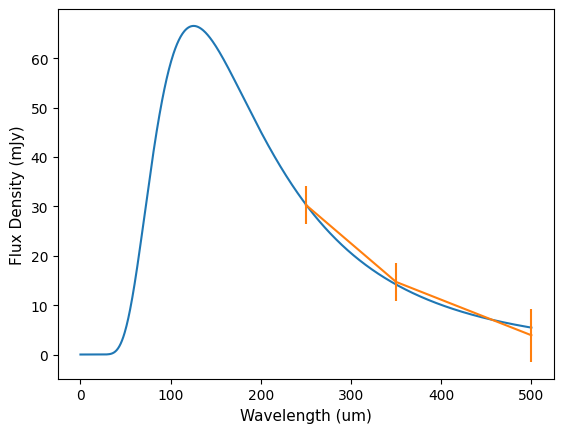

[[Variables]]
    T0:  25.7615430 (init = 10)
    A0:  0.00758907 (init = 1)
--------------------------------------------
Theoretical T_obs =  25.665859564164652


In [317]:
# Set initial fit parameters
p0 = (10, 1)
p = lmfit.Parameters()
p.add_many(('T0', p0[0]), ('A0', p0[1]))
v = p.valuesdict()

def residual(p):
    v = p.valuesdict()
    return (vector_modified_blackbody_distribution(freq_obs, v['T0'], v['A0']) - spire_fluxes) / spire_flux_errors

# Obtain initial fit using minimizers
mi = lmfit.minimize(residual, p, method='nelder')
# lmfit.printfuncs.report_fit(mi.params, min_correl=0.0)

# Show best fit model
T_obs = mi.params['T0'].value
A = mi.params['A0'].value
best_fit = vector_modified_blackbody_distribution(fa, T_obs, A)

plt.xlabel('Wavelength (um)', fontsize = 11)
plt.ylabel('Flux Density (mJy)', fontsize = 11)
plt.plot(wa, best_fit, label='Best fitting\nmodel')
plt.errorbar(SPIRE_wavelengths, spire_fluxes, yerr=spire_flux_errors)

# plt.loglog()
# plt.xlim(5e1,6e2)
# plt.ylim(1e-1,2e1)
plt.show()

lmfit.printfuncs.report_fit(mi.params, min_correl=0.0)
print('--------------------------------------------')
print('Theoretical T_obs = ', T[index_number]/(1+z[index_number]))


In [283]:
vector_modified_blackbody_distribution(freq_obs, v['T0'], v['A0'])

array([106.06539489, 122.43818555,  87.98736672])

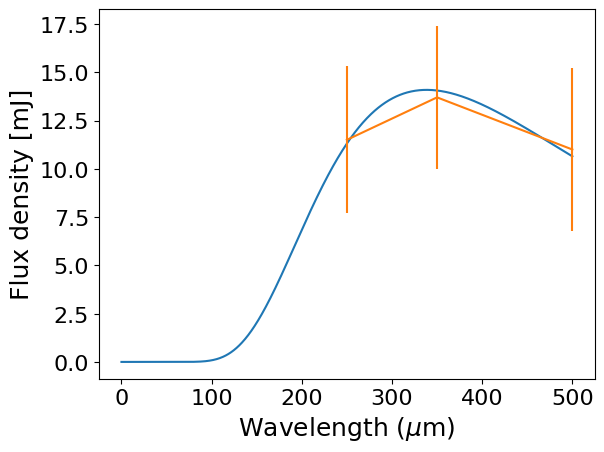

[[Variables]]
    T0:  9.55679024 (init = 10)
    A0:  0.13930862 (init = 1)
--------------------------------------------
Theoretical T_obs =  8.51293103448276


In [354]:


index_number = 34


spire_fluxes = (S_array[index_number])
spire_flux_errors = S_err_array[index_number]

# spire_fluxes = np.array([38.8, 56.8, 58.5 ]) 
# spire_flux_errors = np.array([12.4,7.0,5.3])

# actual source parameters
actual_z = z[index_number]
actual_T = T[index_number]

# Set initial fit parameters
p0 = (10, 1)
p = lmfit.Parameters()
p.add_many(('T0', p0[0]), ('A0', p0[1]))
v = p.valuesdict()

def residual(p):
    v = p.valuesdict()
    return (vector_modified_blackbody_distribution(freq_obs, v['T0'], v['A0']) - spire_fluxes) / spire_flux_errors

# Obtain initial fit using minimizers
mi = lmfit.minimize(residual, p, method='nelder')
# lmfit.printfuncs.report_fit(mi.params, min_correl=0.0)

# Show best fit model
T_obs = mi.params['T0'].value
A = mi.params['A0'].value
best_fit = vector_modified_blackbody_distribution(fa, T_obs, A)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlabel('Wavelength ($\mu$m)', fontsize=18)

plt.ylabel('Flux density [mJ]', fontsize = 18)
plt.plot(wa, best_fit, label='Best fitting\nmodel')
plt.errorbar(SPIRE_wavelengths, spire_fluxes, yerr=spire_flux_errors)
plt.show()

lmfit.printfuncs.report_fit(mi.params, min_correl=0.0)
print('--------------------------------------------')
print('Theoretical T_obs = ', T[index_number]/(1+z[index_number]))






In [356]:
z[86]

0.673

# ######

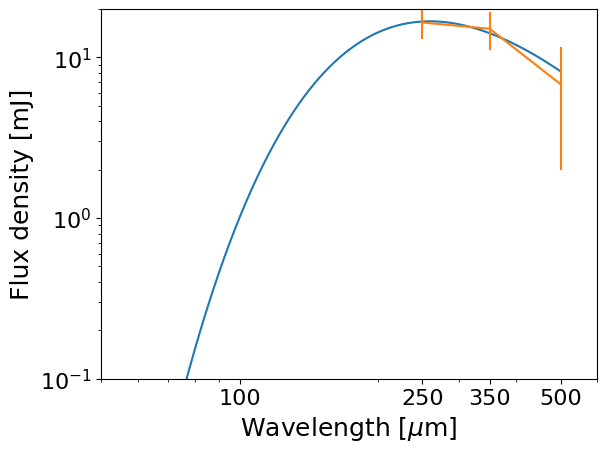

[[Variables]]
    T0:  12.4700904 (init = 10)
    A0:  0.05016292 (init = 1)
--------------------------------------------
Theoretical T_obs =  12.457586039747941


In [361]:
index_number = 422
spire_fluxes, spire_flux_errors = S_array[index_number], S_err_array[index_number]
actual_z, actual_T = z[index_number], T[index_number]

# Set initial fit parameters
p = lmfit.Parameters()
p.add_many(('T0', 10), ('A0', 1))

# Define residual function
def residual(p):
    v = p.valuesdict()
    return (vector_modified_blackbody_distribution(freq_obs, v['T0'], v['A0']) - spire_fluxes) / spire_flux_errors

# Obtain initial fit using minimizers
mi = lmfit.minimize(residual, p, method='nelder')

# Show best fit model
T_obs, A = mi.params['T0'].value, mi.params['A0'].value
best_fit = vector_modified_blackbody_distribution(fa, T_obs, A)

# Plotting
plt.loglog()
plt.xlabel('Wavelength [$\mu$m]', fontsize=18)
plt.ylabel('Flux density [mJ]', fontsize = 18)
plt.plot(wa, best_fit, label='Best fitting\nmodel')
plt.errorbar(SPIRE_wavelengths, spire_fluxes, yerr=spire_flux_errors)
plt.xlim(5e1,6e2)
plt.ylim(1e-1,2e1)

# Set the locations of the xticks
locs = np.append(plt.gca().xaxis.get_major_locator().tick_values(5e1,6e2), [250, 350,500])
plt.gca().xaxis.set_major_locator(ticker.FixedLocator(locs))

# Set the labels of the xticks
labels = [str(int(loc)) if loc >= 100 else '' for loc in locs]
plt.gca().xaxis.set_major_formatter(ticker.FixedFormatter(labels))

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

lmfit.printfuncs.report_fit(mi.params, min_correl=0.0)
print('--------------------------------------------')
print('Theoretical T_obs = ', T[index_number]/(1+z[index_number]))